In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [249]:
weightData = pd.read_csv('weightData.csv')
weightData

,month,dayWeek,hour,mother age,sex,ga,birthweight,prevBirths
0,1,4,11,25,M,40,3570,1
1,1,6,0,28,M,39,3560,1
2,1,6,17,36,F,39,3130,1
3,1,6,22,32,F,40,2760,1
4,1,6,8,39,F,38,2948,4
...,...,...,...,...,...,...,...,...
1043767,12,4,12,34,M,39,3714,2
1043768,12,3,9,39,F,39,3118,3
1043769,12,6,16,37,F,38,2950,2
1043770,12,3,19,35,F,37,3742,3


# Population pyramid [22 pts]

Plot the pyramid for the newborns' weights. 

You need to use the `np.histogram` function from numpy to count the values in a specificied bins. For the weigth bins (vertical axis), use: '<750','750-1249','1250-1749','1750-2249','2250-2749','2750-3249','3250-3749','3750-4249','4250-4749','4750+'.

Using the bins and counts returned by `np.histogram`, use the matplotlib's barsh function to plot the bars. 


<img title="pyramid" src="pyramid.png" width="500">
 


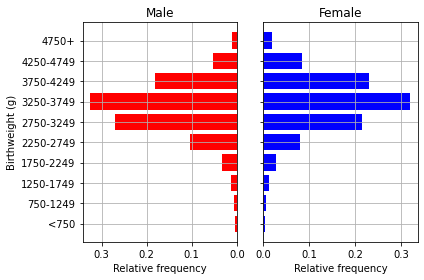

In [79]:
#https://sharkcoder.com/data-visualization/mpl-bidirectional

bin_edgesAll = np.linspace(750,4750,11)

histMale, bin_edgesarrayMale = np.histogram( weightData.loc[ weightData['sex']=='F']['birthweight'], 
                                            bins = bin_edgesAll )

histFemale, bin_edgesarrayFemale = np.histogram( weightData.loc[ weightData['sex']=='M']['birthweight'], 
                                                bins = bin_edgesAll )

f, axes = plt.subplots(1, 2, sharey=True)

axes = axes.ravel()

axes[0].barh( np.arange( len(histMale) ), histMale/np.sum(histMale), color='r'  )

axes[0].set_xlabel( 'Relative frequency')
axes[0].set_ylabel( 'Birthweight (g)')
axes[0].set_yticks(  np.arange( len(histMale) )  )
axes[0].set_yticklabels(  ['<750', '750-1249','1250-1749','1750-2249','2250-2749','2750-3249','3250-3749','3750-4249','4250-4749','4750+' ])
axes[0].set_title('Male')
axes[0].invert_xaxis() 
axes[0].grid()

axes[1].barh( np.arange( len(histFemale) ), histFemale/np.sum(histFemale), align='center', color='b'  )
axes[1].set_xlabel( 'Relative frequency')
axes[1].set_title('Female')
plt.grid()

plt.tight_layout()
plt.show()


# Gestational month histogram [12pts]

Plot the histogram of the birtweight for both sexes using a FacetGrid.

<img title="histGA" src="histGA.png" width="500">
 


C:\Users\marcj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


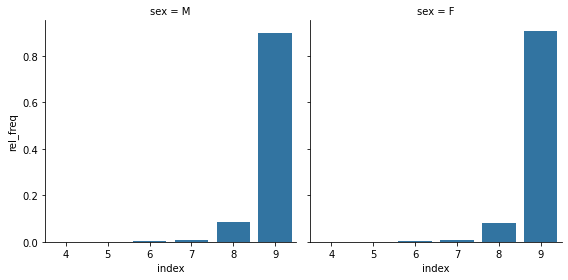

In [109]:

def gaWeeksToMonth(gaWeek):
    
    if gaWeek < 4:
        return 1
    elif gaWeek < 10 :
        return 2
    elif gaWeek < 13 :
        return 3
    elif gaWeek < 19 :
        return 4
    elif gaWeek < 23 :
          return 5          
    elif gaWeek < 28 :
        return 6
    elif gaWeek < 32 :
        return 7
    elif gaWeek < 37 :
        return 8
    else :
        return 9
    
#wrangling
weightData['monthGA'] = weightData['ga'].apply(lambda x:  gaWeeksToMonth(x))

weightData_sex_F = weightData[weightData['sex'] == 'F']
a = weightData_sex_F['monthGA'].value_counts()
df_F = pd.DataFrame(a)
df_F['sex'] = 'F'
df_F['rel_freq'] = df_F['monthGA'] / np.sum(df_F['monthGA'])

weightData_sex_M = weightData[weightData['sex'] == 'M']
a = weightData_sex_M['monthGA'].value_counts()
df_M = pd.DataFrame(a)
df_M['sex'] = 'M'
df_M['rel_freq'] = df_M['monthGA'] / np.sum(df_M['monthGA'])

df_final = pd.concat([df_M, df_F]).reset_index()
df_final

#plotting
g = sns.FacetGrid(df_final, col='sex', height=4)

g.map( sns.barplot,  "index",  "rel_freq"   )
plt.tight_layout()


# Violin plot [22 pts]

Create a violin plot to show the distribution of birthweights by gestational age in months.

Check the Seaborn's violinplot documentation to generate distribution by sex in the same plot.

<img title="violin" src="violin.png" width="600">
 

<AxesSubplot:xlabel='monthGA', ylabel='birthweight'>

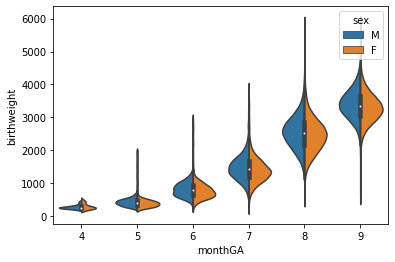

In [116]:
weightData['monthGA'] = weightData['ga'].apply(lambda x:  gaWeeksToMonth(x))

sns.violinplot(data=weightData, x="monthGA", y="birthweight", hue="sex", split=True)

# Bivariate histogram [22ts]

Create a bivarate histogram to display the number of births per hour and week day.


<img title="birthsDays" src="birthsDays.png" width="500">
 

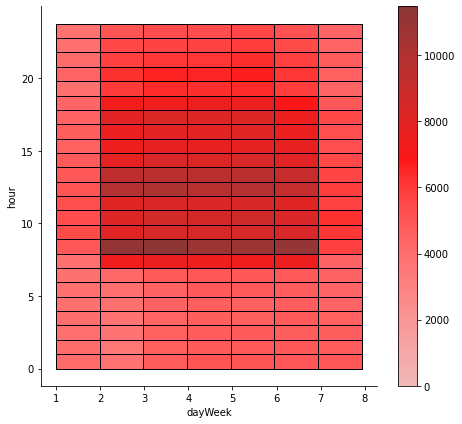

In [269]:
df_3 = weightData.groupby(['dayWeek', 'hour']).size().reset_index(name='count')

sns.displot(data=df_3, x="dayWeek", y="hour", weights="count", cbar=True, color='r', height=6, aspect=1.1, binwidth=(0.99, 0.99), edgecolor="black", linewidth=0.5, kind="hist")
plt.tight_layout()


# Boxplot [22 pts]

Create a boxplot to compare the weight of the first birth', second birth and third or higher births. Only use data from newborns whose gestational age is greater than or equal to 37 weeks. Use the variable lw_flag to separate the plot for newborns with low and normal weight. 

<img title="birthsDays" src="boxplotWeights.png" width="600">
 
 

In [273]:
weightData = pd.read_csv('weightData.csv')
weightData

,month,dayWeek,hour,mother age,sex,ga,birthweight,prevBirths
0,1,4,11,25,M,40,3570,1
1,1,6,0,28,M,39,3560,1
2,1,6,17,36,F,39,3130,1
3,1,6,22,32,F,40,2760,1
4,1,6,8,39,F,38,2948,4
...,...,...,...,...,...,...,...,...
1043767,12,4,12,34,M,39,3714,2
1043768,12,3,9,39,F,39,3118,3
1043769,12,6,16,37,F,38,2950,2
1043770,12,3,19,35,F,37,3742,3


In [274]:
weightData['births'] = weightData['prevBirths']
weightData['births'] = weightData['births'].replace({2:2, 3:3,4:3,5:3,6:3,7:3,8:3,9:3})

weightData['lw_flag'] = 0
weightData.loc[ weightData['birthweight'] < 2500, 'lw_flag'] = 1
weightData

,month,dayWeek,hour,mother age,sex,ga,birthweight,prevBirths,births,lw_flag
0,1,4,11,25,M,40,3570,1,1,0
1,1,6,0,28,M,39,3560,1,1,0
2,1,6,17,36,F,39,3130,1,1,0
3,1,6,22,32,F,40,2760,1,1,0
4,1,6,8,39,F,38,2948,4,3,0
...,...,...,...,...,...,...,...,...,...,...
1043767,12,4,12,34,M,39,3714,2,2,0
1043768,12,3,9,39,F,39,3118,3,3,0
1043769,12,6,16,37,F,38,2950,2,2,0
1043770,12,3,19,35,F,37,3742,3,3,0


C:\Users\marcj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


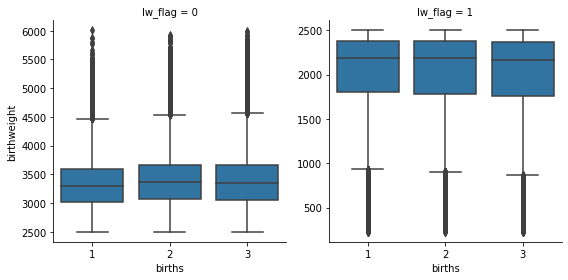

In [277]:
#plotting
g = sns.FacetGrid(weightData, col='lw_flag', height=4, sharey=False)

g.map( sns.boxplot,  "births",  "birthweight"   )
plt.tight_layout()